In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

T = 5*60

If you have a detector periodically checking for events with period T, and aynchronous events, the time to detection will have a uniform distribution. 

The probability that a single detector will have detected an event within t seconds: `P(t) = t / T`

The probabilty that either of two detectors has detected the event at time t is:
`P(Detector1 or Detector2) = P1(t) + P2(t) - P12(t)`, where `P12(t)` is the probability that BOTH detectors have detected the event. `P12(t)` is easily computed as `P1(t)*P2(t)`. 

So, let `alpha = t / T`, then for two detectors: Ptwo(t) = 2*alpha - alpha^2. 

If you add a third, the new probability is the same combination Pthree(t) = Ptwo + Pthird - Ptwo*Pthird

And you can do this iteratively for N detectors. 



In [32]:
def P(t, T, N):
    """Return the probability of detection at time t, if there are N 
    independent checkers checking for events every T seconds"""
    a = t/T; 

    for _ in range(N-1):
        a = 2*a - a*a
    return a
    

<IPython.core.display.Javascript object>


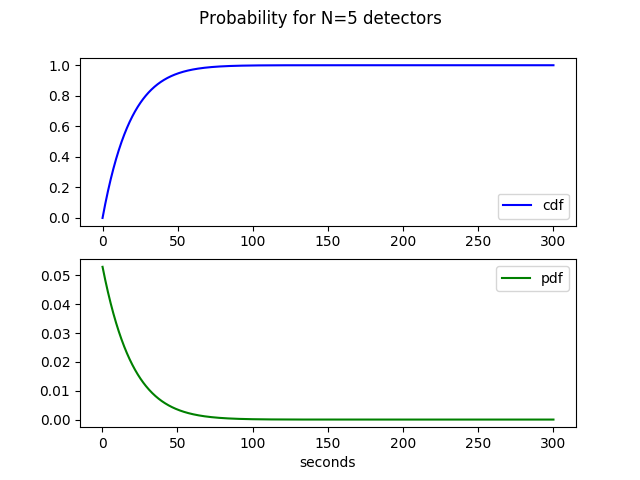

In [62]:
N = 5 # number of independent detectors
dT = bins[1]-bins[0]
combined_cdf = np.array([P(t, T, N) for t in bins])
combined_pdf = np.diff(combined_cdf)/dT
fig, axes = plt.subplots(2, 1)
cdf_line = axes[0].plot(bins, combined_cdf, 'b', label="cdf")
pdf_line = axes[1].plot(bins[1:], combined_pdf, 'g', label="pdf")
fig.suptitle('Probability for N=%d detectors' % N)
axes[1].set_xlabel('seconds')
axes[0].legend()
axes[1].legend()

In [55]:
# Compute the expected value of detection

expected_value = (np.sum((1-combined_cdf) * T/len(combined_cdf)))
print "Expected value of time to detection (t): %.2fs" % expected_value

Expected value of time to detection (t): 17.78s
